In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataConcrete = pd.read_csv("concrete.csv")
dataConcrete.shape

(1030, 9)

In [3]:
type(dataConcrete)

pandas.core.frame.DataFrame

In [4]:
dataConcrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement              1030 non-null float64
BlastFurnaceSlag    1030 non-null float64
FlyAsh              1030 non-null float64
Water               1030 non-null float64
Superplasticize     1030 non-null float64
CoarseAggregate     1030 non-null float64
FineAggregate       1030 non-null float64
Age                 1030 non-null int64
CompStrength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
dataConcrete.corr()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticize,CoarseAggregate,FineAggregate,Age,CompStrength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
BlastFurnaceSlag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
FlyAsh,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticize,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
CoarseAggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
FineAggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
CompStrength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


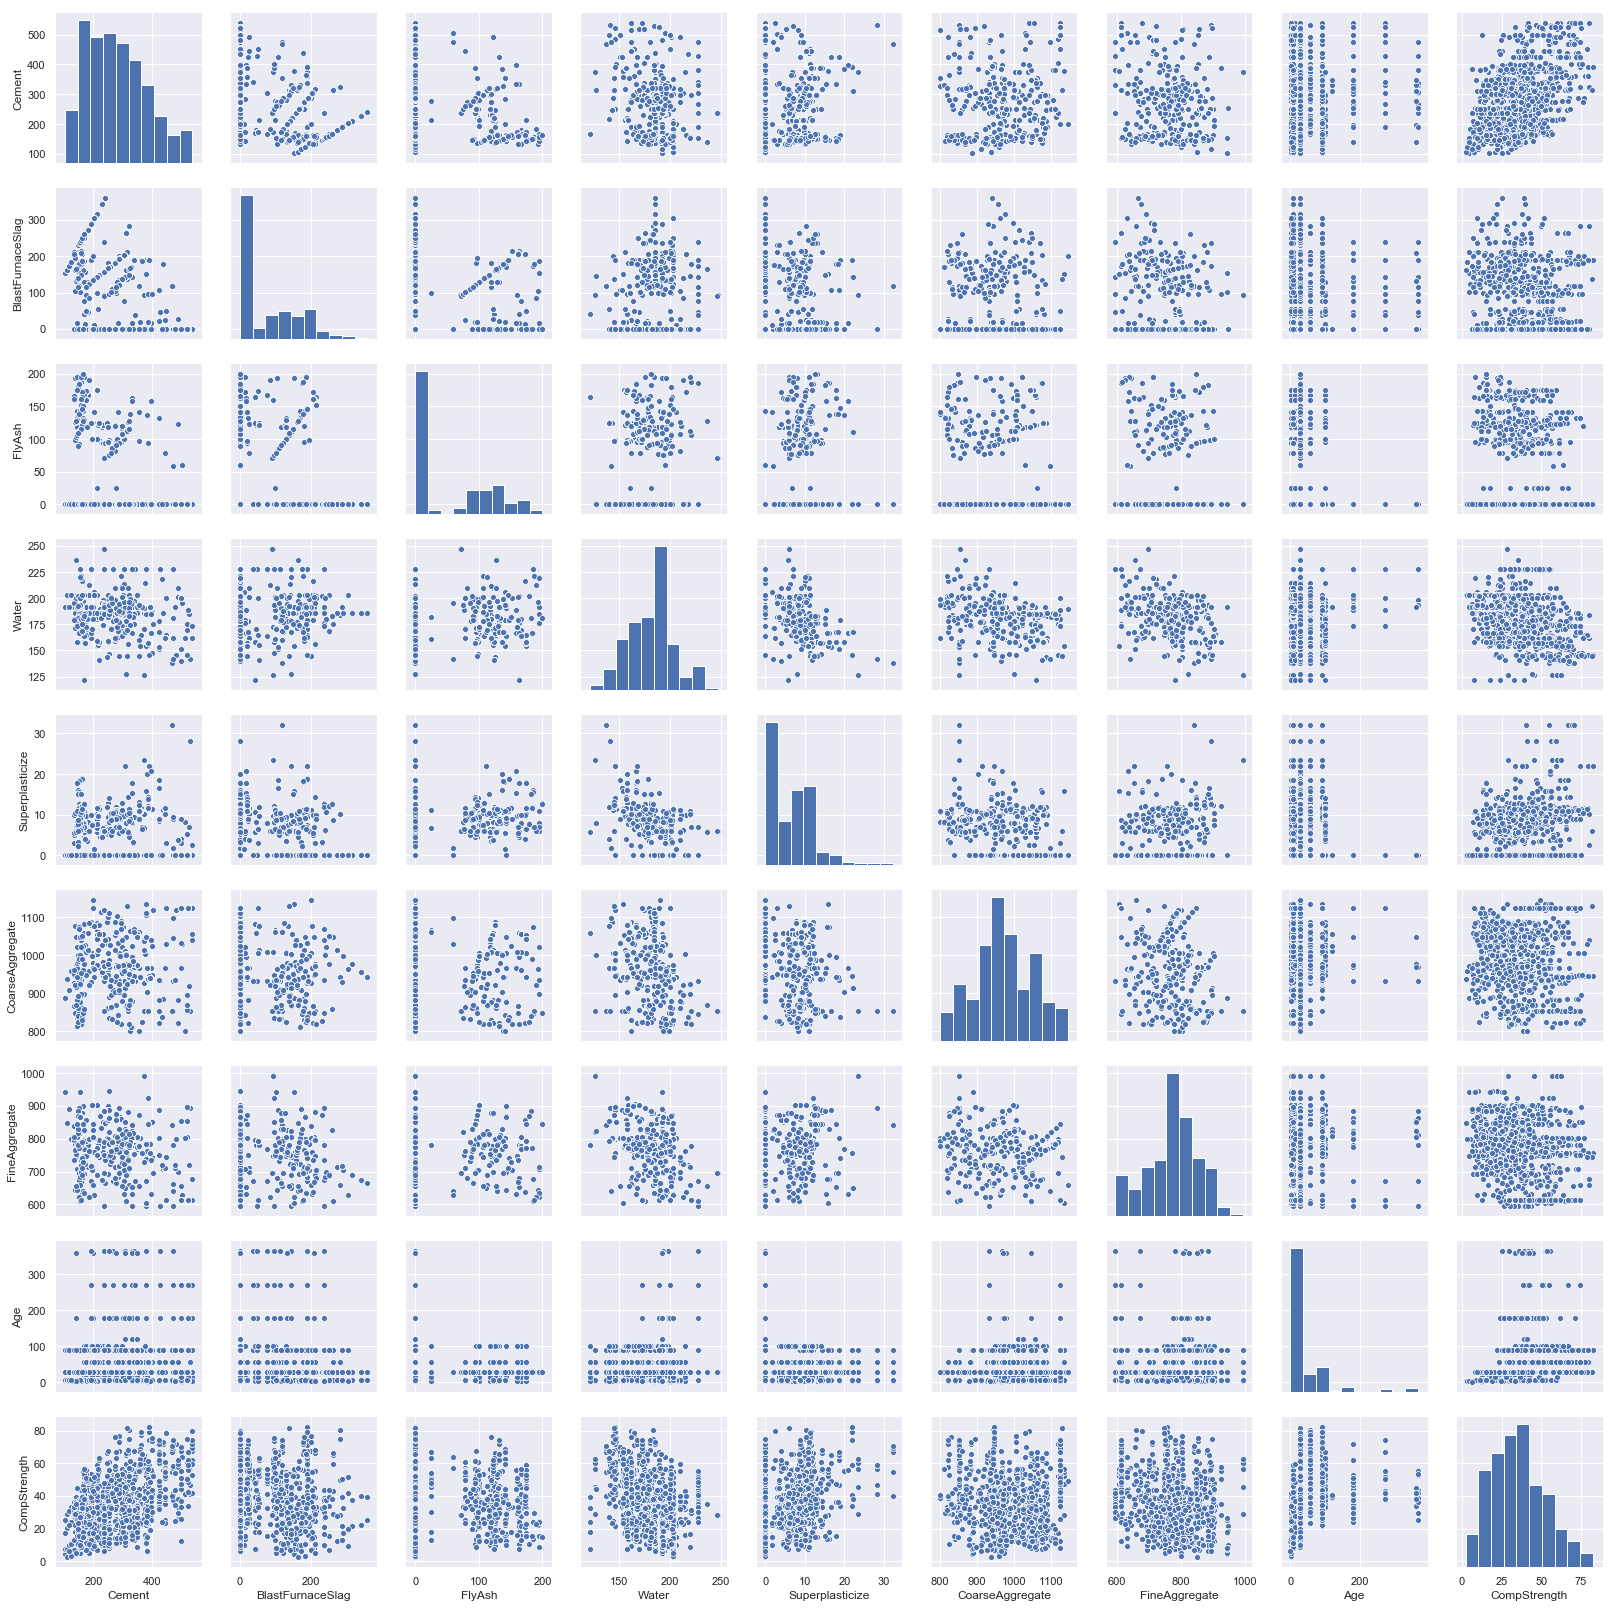

In [7]:
sns.set()
sns.pairplot(dataConcrete)

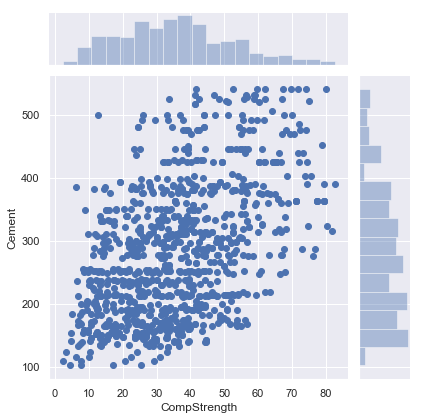

In [8]:
sns.jointplot(dataConcrete.CompStrength, dataConcrete.Cement )

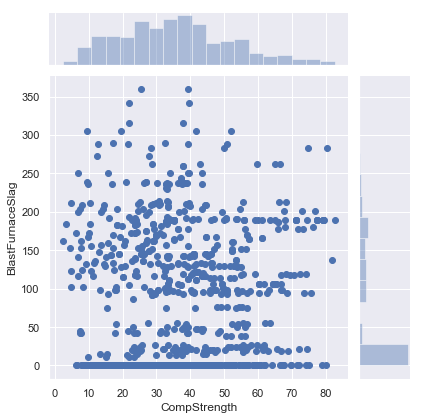

In [9]:
sns.jointplot(dataConcrete.CompStrength, dataConcrete.BlastFurnaceSlag )

In [10]:
dataConcrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement              1030 non-null float64
BlastFurnaceSlag    1030 non-null float64
FlyAsh              1030 non-null float64
Water               1030 non-null float64
Superplasticize     1030 non-null float64
CoarseAggregate     1030 non-null float64
FineAggregate       1030 non-null float64
Age                 1030 non-null int64
CompStrength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [11]:
dataConcrete.describe() 

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticize,CoarseAggregate,FineAggregate,Age,CompStrength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


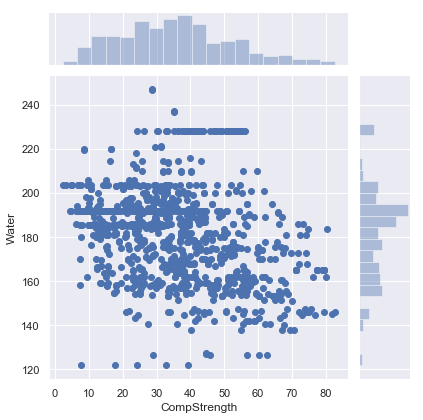

In [12]:
sns.jointplot(dataConcrete.CompStrength, dataConcrete.Water )

In [14]:

from __future__ import print_function
import statsmodels.api as sm
from patsy import dmatrices

In [15]:
from statsmodels.formula.api import ols
model1 = ols('CompStrength ~ Cement + BlastFurnaceSlag + Water + FlyAsh + Superplasticize + CoarseAggregate + FineAggregate + Age', data=dataConcrete).fit()

In [16]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:           CompStrength   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     204.3
Date:                Mon, 21 Jan 2019   Prob (F-statistic):          6.29e-206
Time:                        21:10:51   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -23.3312     26.586  

In [17]:
concretepred = model1.predict()
print(concretepred)

[53.46346329 53.73475651 56.81258504 ... 26.46841169 29.12237014
 31.89770807]


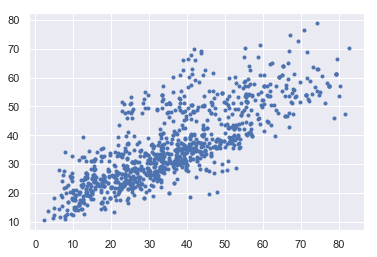

In [18]:
import matplotlib.pyplot as plt

plt.plot(dataConcrete.CompStrength, concretepred, '.')
plt.show()

In [19]:
# Forward Selection

In [20]:
def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = ols(formula, data).fit()
    return model

In [21]:
model = forward_selected(dataConcrete, 'CompStrength')

In [22]:
print(model.model.formula)

CompStrength ~ Cement + Superplasticize + Age + BlastFurnaceSlag + Water + FlyAsh + 1


In [23]:
print(model.rsquared_adj)

0.6117585594339112


In [24]:
print(dataConcrete.columns.difference(['CompStrength']))

Index(['Age', 'BlastFurnaceSlag', 'Cement', 'CoarseAggregate', 'FineAggregate',
       'FlyAsh', 'Superplasticize', 'Water'],
      dtype='object')


In [25]:
ConcreteX = dataConcrete[dataConcrete.columns.difference(['CompStrength'])]
 

In [26]:
ConcreteX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 8 columns):
Age                 1030 non-null int64
BlastFurnaceSlag    1030 non-null float64
Cement              1030 non-null float64
CoarseAggregate     1030 non-null float64
FineAggregate       1030 non-null float64
FlyAsh              1030 non-null float64
Superplasticize     1030 non-null float64
Water               1030 non-null float64
dtypes: float64(7), int64(1)
memory usage: 64.5 KB


In [27]:
X=ConcreteX
y = dataConcrete.CompStrength

In [28]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')

Add  Cement                         with p-value 1.32418e-65
Add  Superplasticize                with p-value 7.34712e-35
Add  Age                            with p-value 4.76269e-52
Add  BlastFurnaceSlag               with p-value 6.97604e-34
Add  Water                          with p-value 7.74776e-19
Add  FlyAsh                         with p-value 3.0305e-18
resulting features:


In [29]:
print(result)

['Cement', 'Superplasticize', 'Age', 'BlastFurnaceSlag', 'Water', 'FlyAsh']


In [30]:
trainConcrete=dataConcrete.sample(frac=0.8,random_state=200)
testConcrete=dataConcrete.drop(trainConcrete.index)
testConcrete.tail()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticize,CoarseAggregate,FineAggregate,Age,CompStrength
1011,287.3,120.5,93.9,187.6,9.2,904.4,695.9,28,43.80
1013,355.9,0.0,141.6,193.3,11.0,801.4,778.4,28,40.87
1022,264.5,111.0,86.5,195.5,5.9,832.6,790.4,28,41.54
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [31]:
trainConcreteX = trainConcrete[trainConcrete.columns.difference(['CompStrength'])]
X=trainConcreteX
y = trainConcrete.CompStrength

In [32]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

Add  Cement                         with p-value 2.15529e-54
Add  Superplasticize                with p-value 1.32517e-28
Add  Age                            with p-value 5.0703e-40
Add  BlastFurnaceSlag               with p-value 4.30884e-31
Add  Water                          with p-value 1.51678e-14
Add  FlyAsh                         with p-value 2.42632e-16
resulting features:
['Cement', 'Superplasticize', 'Age', 'BlastFurnaceSlag', 'Water', 'FlyAsh']


In [33]:
columns = ['Cement', 'Superplasticize', 'Age', 'BlastFurnaceSlag', 'Water', 'FlyAsh']

In [34]:
testConcreteX = pd.DataFrame(testConcrete, columns=columns)  

In [35]:
testConcreteX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 0 to 1028
Data columns (total 6 columns):
Cement              206 non-null float64
Superplasticize     206 non-null float64
Age                 206 non-null int64
BlastFurnaceSlag    206 non-null float64
Water               206 non-null float64
FlyAsh              206 non-null float64
dtypes: float64(5), int64(1)
memory usage: 11.3 KB
